In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy
from useful_functions_with_batch import *
from opt_function_with_batch import *
from network_utils import *
from opt_function_with_batch_consensus import PushPull_with_batch_consensus

In [2]:
d=10
L_total=8000
h_global, y_global, x_opt = init_global_data(d=d, L_total=L_total, seed=42)
print("h:",h_global.shape)
print("y:",y_global.shape)

h: (8000, 10)
y: (8000,)


In [3]:
n=2
h_tilde, y_tilde = distribute_data(h=h_global, y=y_global, n=n)
print("h_tilde:",h_tilde.shape)
print("y_tilde:",y_tilde.shape)
x_star = generate_x_star(n=n, d=d, x_opt=x_opt, sigma_h=10)
init_x = init_x_func(n=n, d=d, seed=42)
A,B = get_matrixs_from_exp_graph(n=n, seed=42)
L2 =  PushPull_with_batch_consensus(
    A=A,
    B=B,
    init_x=init_x,
    h_data=h_tilde,
    y_data=y_tilde,
    grad_func=grad_with_batch,
    rho=1e-2,
    lr=5e-2,
    sigma_n=0,
    max_it=10000,
    batch_size=200
)

h_tilde: (2, 4000, 10)
y_tilde: (2, 4000)


In [4]:
n=8
h_tilde, y_tilde = distribute_data(h=h_global, y=y_global, n=n)
x_star = generate_x_star(n=n, d=d, x_opt=x_opt, sigma_h=10)
init_x = init_x_func(n=n, d=d, seed=42)
A,B = get_matrixs_from_exp_graph(n=n, seed=42)
print("h_tilde:",h_tilde.shape,'\n')
L3 = PushPull_with_batch_consensus(
    A=A,
    B=B,
    init_x=init_x,
    h_data=h_tilde,
    y_data=y_tilde,
    grad_func=grad_with_batch,
    rho=1e-2,
    lr=5e-2,
    sigma_n=0,
    max_it=10000,
    batch_size=200
)

h_tilde: (8, 1000, 10) 



In [5]:
n=16
h_tilde, y_tilde = distribute_data(h=h_global, y=y_global, n=n)
x_star = generate_x_star(n=n, d=d, x_opt=x_opt, sigma_h=10)
init_x = init_x_func(n=n, d=d, seed=42)
A,B = get_matrixs_from_exp_graph(n=n, seed=42)
print("h_tilde:",h_tilde.shape,'\n')
L4 = PushPull_with_batch_consensus(
    A=A,
    B=B,
    init_x=init_x,
    h_data=h_tilde,
    y_data=y_tilde,
    grad_func=grad_with_batch,
    rho=1e-2,
    lr=5e-2,
    sigma_n=0,
    max_it=10000,
    batch_size=200,
)

h_tilde: (16, 500, 10) 



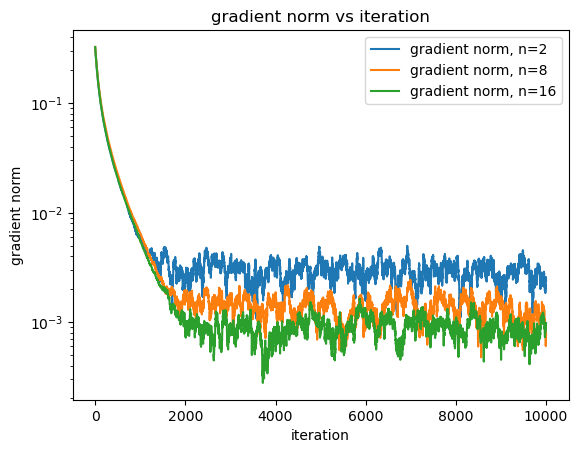

In [6]:
plt.semilogy(L2["gradient_norm_on_full_trainset"],label="gradient norm, n=2")
plt.semilogy(L3["gradient_norm_on_full_trainset"],label="gradient norm, n=8")
plt.semilogy(L4["gradient_norm_on_full_trainset"],label="gradient norm, n=16")
plt.xlabel("iteration")
plt.ylabel("gradient norm")
plt.title("gradient norm vs iteration")
plt.legend()
plt.show()

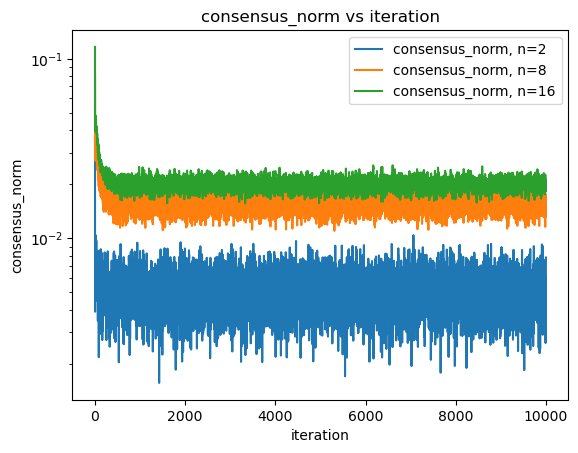

In [29]:
plt.semilogy(L2["consensus_norm"],label="consensus_norm, n=2")
plt.semilogy(L3["consensus_norm"],label="consensus_norm, n=8")
plt.semilogy(L4["consensus_norm"],label="consensus_norm, n=16")
plt.xlabel("iteration")
plt.ylabel("consensus_norm")
plt.title("consensus_norm vs iteration")
plt.legend()
plt.show()

0.4606314147290453
0.4606372035880553
0.46060647013314787


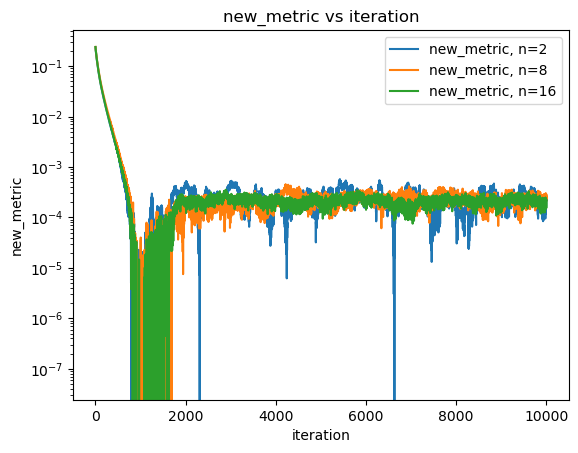

In [42]:
start = 6000

print(L2["new_metric"][start:].mean())
print(L3["new_metric"][start:].mean())
print(L4["new_metric"][start:].mean())

plt.semilogy(L2["new_metric"]-0.4604,label="new_metric, n=2")
plt.semilogy(L3["new_metric"]-0.4604,label="new_metric, n=8")
plt.semilogy(L4["new_metric"]-0.4604,label="new_metric, n=16")
plt.xlabel("iteration")
plt.ylabel("new_metric")
plt.title("new_metric vs iteration")
plt.legend()
plt.show()

0.46063003833181493


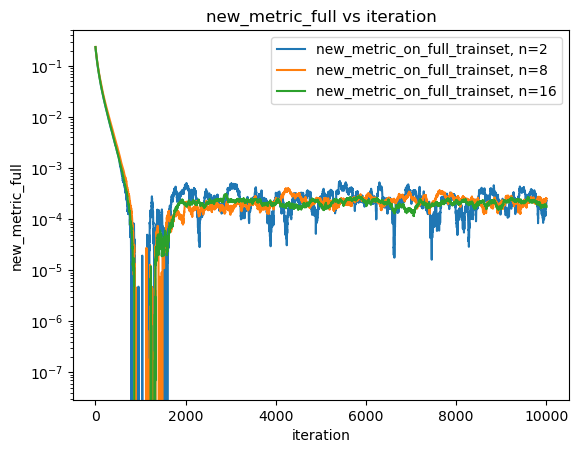

In [11]:
start = 6000

print(L2["new_metric_on_full_trainset"][start:].mean())


plt.semilogy(L2["new_metric_on_full_trainset"]-0.4604,label="new_metric_on_full_trainset, n=2")
plt.semilogy(L3["new_metric_on_full_trainset"]-0.4604,label="new_metric_on_full_trainset, n=8")
plt.semilogy(L4["new_metric_on_full_trainset"]-0.4604,label="new_metric_on_full_trainset, n=16")
plt.xlabel("iteration")
plt.ylabel("new_metric_full")
plt.title("new_metric_full vs iteration")
plt.legend()
plt.show()